 **Problem Statement**

 As the seventh leading cause of mortality and one of the main causes of disability and dependency among older people worldwide, dementia is frequently unrecognized and misunderstood, which leads to stigmatization and barriers to diagnosis and care.

## **DATA PREPARATION PROCESS**

In [175]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import  XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [152]:
# Reading in the data
dementia = pd.read_csv('dementia_dataset.csv')
dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### **Column Description**
EDUC	- Years of Education

SES	- Socioeconomic Status

MMSE	- Mini Mental State Examination

CDR	- Clinical Dementia Rating

eTIV	- Estimated Total Intracranial Volume

nWBV	- Normalize Whole Brain Volume

ASF	- Atlas Scaling Factor

In [79]:
dementia.sample(11)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
145,OAS2_0068,OAS2_0068_MR1,Nondemented,1,0,F,R,88,12,3.0,30.0,0.0,1428,0.700,1.229
42,OAS2_0022,OAS2_0022_MR2,Nondemented,2,828,F,R,64,16,3.0,29.0,0.0,1316,0.796,1.333
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
352,OAS2_0178,OAS2_0178_MR2,Nondemented,2,600,F,R,90,14,2.0,28.0,0.0,1495,0.746,1.174
137,OAS2_0064,OAS2_0064_MR2,Demented,2,830,F,R,81,8,5.0,26.0,0.5,1459,0.694,1.203
254,OAS2_0122,OAS2_0122_MR1,Nondemented,1,0,F,R,86,16,3.0,30.0,0.0,1293,0.747,1.357
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162
164,OAS2_0076,OAS2_0076_MR2,Nondemented,2,956,F,R,69,18,2.0,29.0,0.0,1536,0.719,1.143
265,OAS2_0127,OAS2_0127_MR5,Converted,5,2639,M,R,86,18,1.0,30.0,0.5,1670,0.669,1.051
366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299


## **Data Cleaning and EDA**

In [80]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [153]:
#rename the M/F column to Sex
dementia = dementia.rename(columns = {'M/F':'Sex'}) 

In [154]:
#Create a dictionary to map the categorical values to numeric
group_mapp = {'Nondemented':0,'Demented':1, 'Converted':2} 
sex_mapp = {'M':1, 'F':0}
dementia.Group = dementia.Group.map(group_mapp) #Perform the mapping
dementia.Sex = dementia.Sex.map(sex_mapp)

In [83]:
dementia.head(11)

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,0,1,0,0,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,0,2,538,0,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,0,1,0,1,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,0,2,1010,1,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,0,3,1603,1,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [84]:
# Shape of the dataset
dementia.shape

(373, 15)

In [85]:
# Summary Statistics of the numeric columns
dementia.describe()

,Group,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,0.589812,1.882038,595.104558,0.428954,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.664461,0.922843,635.485118,0.495592,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,0.000000,2.000000,552.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,1.000000,2.000000,873.000000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,2.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


**FEATURE SELECTION WITH CORRELATION METHOD**

In [90]:
dementia.corr()

ValueError: could not convert string to float: 'OAS2_0001'

In [87]:
#visualize the correlation 
plt.figure(figsize = (20, 8))
sns.heatmap(dementia.corr(), annot = True, cmap = "viridis")
plt.title("Correlation")
plt.show()

ValueError: could not convert string to float: 'OAS2_0001'

<Figure size 2000x800 with 0 Axes>

In [88]:
#remove the deafult columns

In [ ]:
our target variable will be group column

In [93]:
dementia[["CDR"]]

,CDR
0,0.0
1,0.0
2,0.5
3,0.5
4,0.5
...,...
368,0.5
369,0.5
370,0.0
371,0.0


In [94]:
dementia.CDR.unique()

array([0. , 0.5, 1. , 2. ])

In [95]:
#checking for null values
dementia.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
Sex            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [97]:
dementia.SES.unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

In [99]:
#where the rows in SES are nulls
dementia.query("SES.isnull()",engine = "python")

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,1,1,0,1,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,1,3,518,1,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,1,4,1281,1,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,1,1,0,0,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,1,2,490,0,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,1,1,0,0,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,1,2,807,0,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


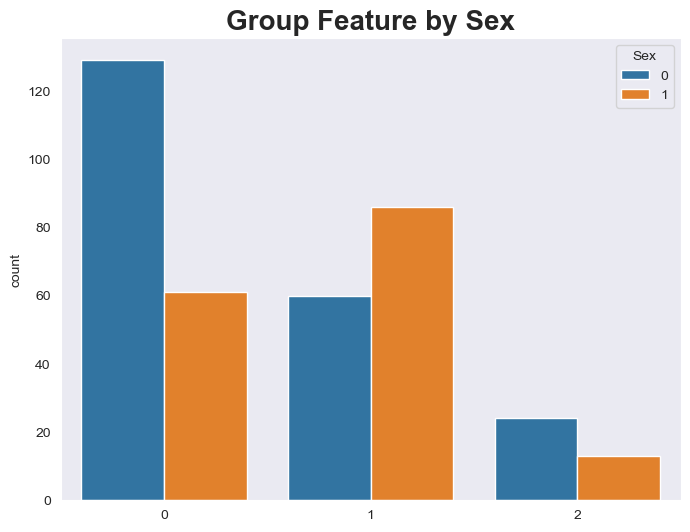

In [105]:
plt.figure(figsize= (8,6))
sns.countplot(x = "Group", data =dementia, hue = "Sex")
plt.title("Group Feature by Sex", size = 20, weight = "bold")
plt.ylabel(("count"))
plt.xlabel("", size = 20)
plt.show()

In [157]:
dementia

,Group,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,3,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [155]:
dementia.drop(["Subject ID", "MRI ID","Hand"], axis = 1, inplace = True)

In [156]:
X = dementia.drop("Group", axis = 1)
y = dementia[["Group"]]
X

,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,2,560,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,3,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [158]:
y

,Group
0,0
1,0
2,1
3,1
4,1
...,...
368,1
369,1
370,0
371,0


In [162]:
scaler = StandardScaler()
x_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
x_norm

,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,-0.957067,-0.937715,1.153798,1.308738,-0.208132,-0.406615,-0.093065,-0.777653,2.836059,-0.905169,-2.265742
1,0.127997,-0.217613,1.153798,1.439787,-0.208132,-0.406615,0.722535,-0.777653,2.932703,-1.309643,-2.316501
2,-0.957067,-0.937715,1.153798,-0.263856,-0.904394,NaN,-1.180531,0.559050,1.079409,0.173429,-1.083784
3,0.127997,-0.055315,1.153798,-0.132806,-0.904394,NaN,0.178802,0.559050,1.420506,-0.446765,-1.344830
4,1.213060,2.048264,1.153798,0.391392,-0.904394,NaN,-1.452397,0.559050,1.193108,-0.770344,-1.170800
...,...,...,...,...,...,...,...,...,...,...,...
368,0.127997,0.389037,1.153798,0.653491,0.488130,-1.289694,0.178802,0.559050,1.164683,-0.959099,-1.149046
369,1.213060,2.681702,1.153798,1.177688,0.488130,-1.289694,-0.364931,0.559050,1.136259,-1.471432,-1.127292
370,-0.957067,-0.937715,-0.866703,-2.098548,-0.556263,-0.406615,0.722535,-0.777653,-0.961488,1.926149,0.982830
371,0.127997,0.264555,-0.866703,-1.836449,-0.556263,-0.406615,0.722535,-0.777653,-0.916009,1.791325,0.924820


In [163]:
 X_train, X_test, y_train, y_test  = train_test_split(x_norm, y, test_size= 0.3, random_state = 1, stratify = y)

In [164]:
len(X_train)

261

In [165]:
len(y_test)

112

In [176]:
classifers = [LogisticRegression(random_state = 42), SVC(random_state = 42),
             RandomForestClassifier(random_state = 42), XGBClassifier(random_state = 42)]
model_names = ["Logistic Regression", "Support vector machine", "Random Forest", "XGradient boost"]

In [173]:
def train_val_models (classifers, model_names, X_train, X_test, y_train, y_test):
    
    reports = []
    
    for clf, model in zip(classifers, model_names): 
        clf.fit(X_train, y_train)
        y_pred = clf.precit (X_test)
        report = classification_report(y_test, y_pred)
        reports.apppend(report)
        
    return model_names, reports

In [177]:
model_names, report = train_val_models(classifiers, model_names,X_train, X_test, y_train, y_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [178]:
for name, report in zip(model_names, reports):
    print(name)
    print(report)
    print("\n\n")

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        57
           1       0.96      1.00      0.98        44
           2       1.00      0.36      0.53        11

    accuracy                           0.94       112
   macro avg       0.96      0.79      0.82       112
weighted avg       0.94      0.94      0.92       112




Support vector machine
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        57
           1       0.95      0.95      0.95        44
           2       0.67      0.36      0.47        11

    accuracy                           0.92       112
   macro avg       0.85      0.77      0.79       112
weighted avg       0.91      0.92      0.91       112




Random Forest
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        57
           1       0.93      0.95      0.94        44
           2